<a href="https://colab.research.google.com/github/choiitea/Choi_DSPN_S24/blob/main/Exercise17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [ ]:
# WRITE YOUR CODE HERE
#install.packages("glmnet")
library(glmnet)
library(tidyverse)



We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [ ]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [ ]:
# WRITE YOUR CODE HERE
# lets first create the main data frame
dat <- data.frame(x = x, y = y)

# pull random sample of 51 observations to serve as test set
test.inds <- sample(1:nrow(dat), 51)
dat$is.test <- 1:nrow(dat) %in% test.inds
# now we should have test and train indicated
head(dat)

# based on the is.test bool values, separate out train and test
# into new data frames for easy manipulation
train_dat <- dat[!dat$is.test, ]
test_dat <- dat[dat$is.test, ]
head(train_dat)
head(test_dat)

,x,y,is.test
,<dbl>,<dbl>,<lgl>
1,-9.00,-1.0383634,FALSE
2,-8.82,-0.7461157,FALSE
3,-8.64,-0.5995247,FALSE
4,-8.46,-0.5442746,FALSE
5,-8.28,-0.6825711,TRUE
6,-8.10,0.6732243,TRUE


,x,y,is.test
,<dbl>,<dbl>,<lgl>
1,-9.00,-1.0383634,FALSE
2,-8.82,-0.7461157,FALSE
3,-8.64,-0.5995247,FALSE
4,-8.46,-0.5442746,FALSE
8,-7.74,0.2369539,FALSE
12,-7.02,0.5469083,FALSE


,x,y,is.test
,<dbl>,<dbl>,<lgl>
5,-8.28,-0.68257115,TRUE
6,-8.10,0.67322428,TRUE
7,-7.92,0.21327419,TRUE
9,-7.56,-0.08663415,TRUE
10,-7.38,1.10789561,TRUE
11,-7.20,1.52564580,TRUE


(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

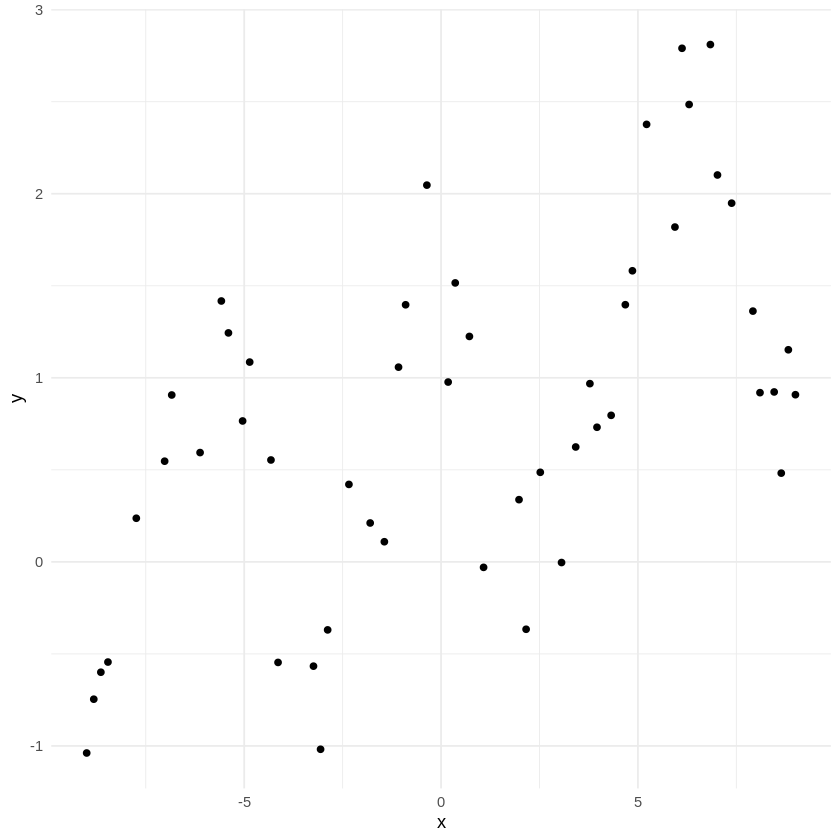

In [ ]:
# WRITE YOUR CODE HERE
ggplot(train_dat, aes(x = x, y = y)) +
  geom_point() +
  xlab("x") +
  ylab("y") +
  theme_minimal()

How would you describe the relationship between $x$ and $y$ based on this plot?

> visually, there seems to be a nonlinear relationship - wave-like pattern (due to the data generation using cosine function).
>

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results.


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

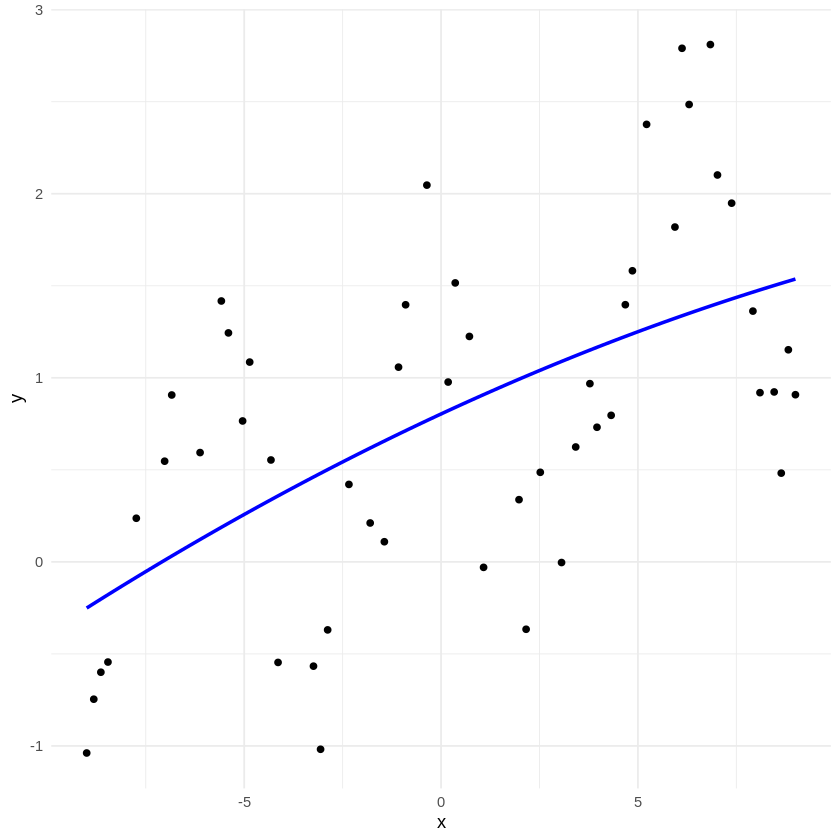

In [ ]:
# WRITE YOUR CODE HERE
ggplot(train_dat, aes(x = x, y = y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2, raw = TRUE), se = FALSE, color = "blue") +
  xlab("x") +
  ylab("y") +
  theme_minimal()

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better?

> it fits the data very poorly. it gets the most general upward trend in the data but it misses how the upward trend is accompanied by more drastic upward curves and downward curves.
>

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

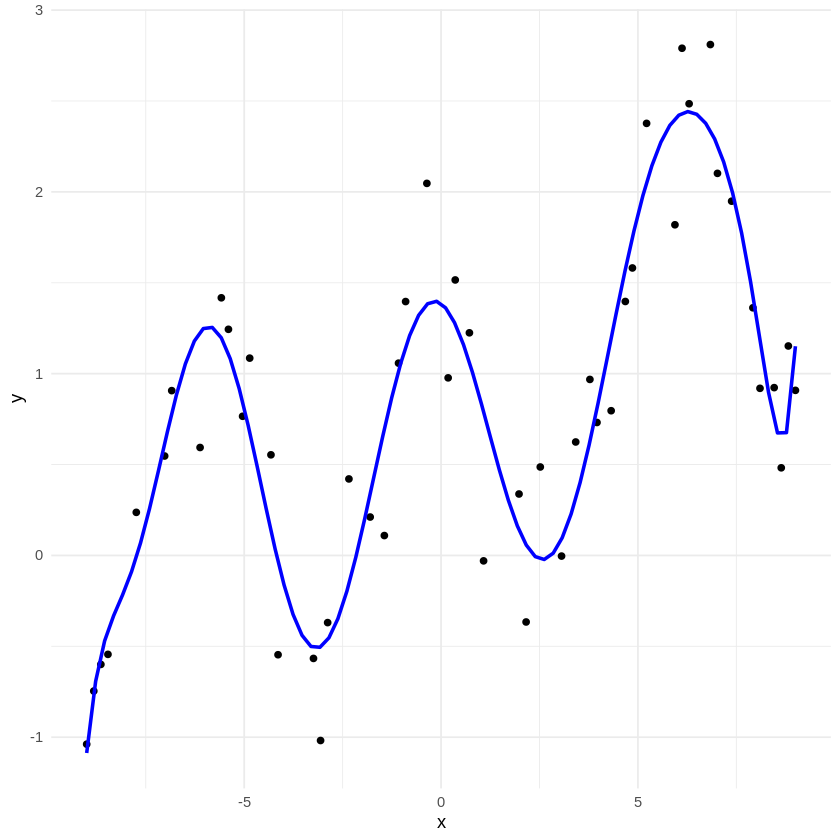

In [ ]:
# WRITE YOUR CODE HERE
ggplot(train_dat, aes(x = x, y = y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 12, raw = TRUE), se = FALSE, color = "blue") +
  xlab("x") +
  ylab("y") +
  theme_minimal()

> yes this fits the training data far better than the 2nd degree model
>

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy.

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

Warning message in predict.lm(model_k, newdata = train_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = test_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = train_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = test_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = train_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = test_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = train_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(

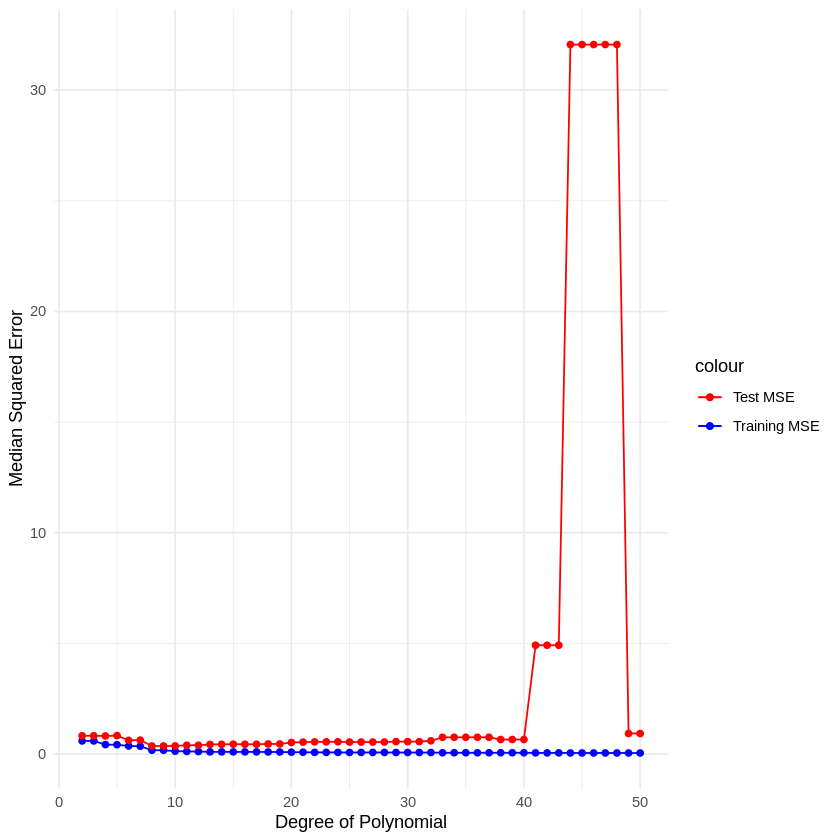

In [ ]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    model_k <- lm(y ~ poly(x, k, raw = TRUE), data = train_dat)
    train_pred <- predict(model_k, newdata = train_dat)
    train_rss[k-1] = sum((train_dat$y - train_pred)^2)

    test_pred <- predict(model_k, newdata = test_dat)
    test_rss[k-1] = sum((test_dat$y-test_pred)^2)
}

# Plot your results here
# WRITE YOUR CODE HERE
# set up mse
train_mse <- train_rss / nrow(train_dat)
test_mse <- test_rss / nrow(test_dat)

mse_df <- data.frame(Degree = degree, Training_MSE = train_mse, Test_MSE = test_mse)

ggplot(mse_df, aes(x = Degree)) +
  geom_line(aes(y = Training_MSE, colour = "Training MSE")) +
  geom_point(aes(y = Training_MSE, colour = "Training MSE")) +
  geom_line(aes(y = Test_MSE, colour = "Test MSE")) +
  geom_point(aes(y = Test_MSE, colour = "Test MSE")) +
  xlab("Degree of Polynomial") +
  ylab("Median Squared Error") +
  scale_color_manual(values = c("Training MSE" = "blue", "Test MSE" = "red"))+
  theme_minimal()

What do you see as $k$ increase?

> Initially, as the model complexity increases, both bias and variance decrease (as both train and test MSE seem to be decreasing or at least remain stable). However, after 40 degrees, test MSE jumps up, indicating that we are now overfitting. But as the degree of polynomial approaches 50, test MSE drops sharply back down (which is... strange because double descent happens when p>n...)

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



Warning message in predict.lm(model_k, newdata = train_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = test_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = train_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = test_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = train_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = test_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(model_k, newdata = train_dat):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(

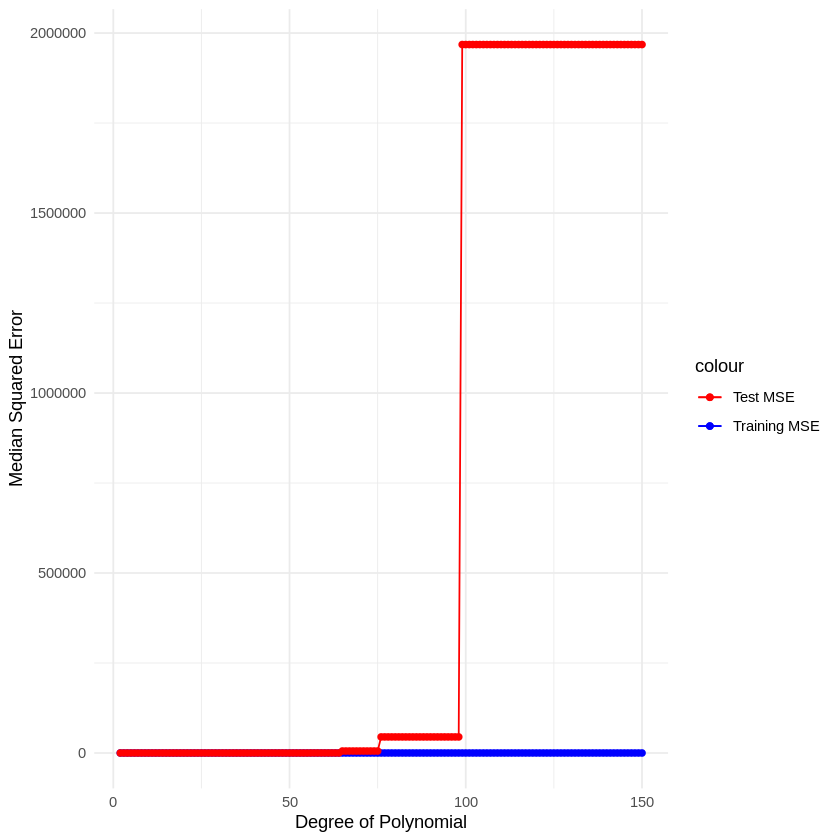

In [ ]:
# WRITE YOUR CODE HERE
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    model_k <- lm(y ~ poly(x, k, raw = TRUE), data = train_dat)
    train_pred <- predict(model_k, newdata = train_dat)
    train_rss[k-1] = sum((train_dat$y - train_pred)^2)

    test_pred <- predict(model_k, newdata = test_dat)
    test_rss[k-1] = sum((test_dat$y-test_pred)^2)
}

# Plot your results here
# WRITE YOUR CODE HERE
# set up mse
train_mse <- train_rss / nrow(train_dat)
test_mse <- test_rss / nrow(test_dat)

mse_df <- data.frame(Degree = degree, Training_MSE = train_mse, Test_MSE = test_mse)

ggplot(mse_df, aes(x = Degree)) +
  geom_line(aes(y = Training_MSE, colour = "Training MSE")) +
  geom_point(aes(y = Training_MSE, colour = "Training MSE")) +
  geom_line(aes(y = Test_MSE, colour = "Test MSE")) +
  geom_point(aes(y = Test_MSE, colour = "Test MSE")) +
  xlab("Degree of Polynomial") +
  ylab("Median Squared Error") +
  scale_color_manual(values = c("Training MSE" = "blue", "Test MSE" = "red"))+
  theme_minimal()

What do you see as $k$ gets larger than $n$?

> I'm seeing a huge jump in test MSE as k>n
>

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time.

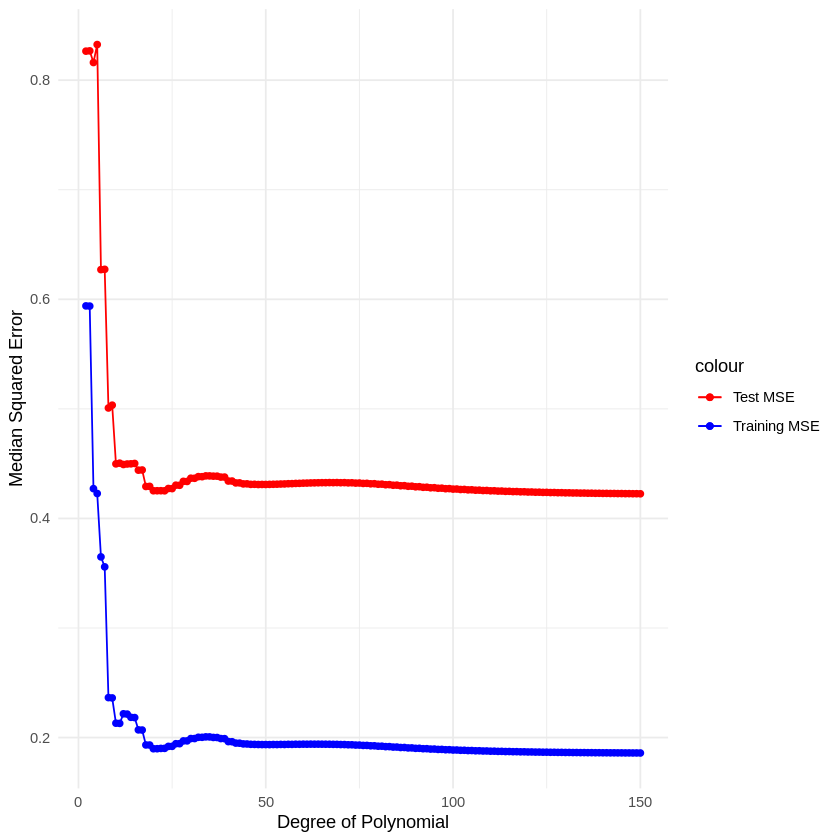

In [ ]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    x_train_poly <- as.matrix(poly(train_dat$x, k, raw = TRUE))
    y_train <- train_dat$y
    x_test_poly <- as.matrix(poly(test_dat$x, k, raw = TRUE))
    # Fit the ridge regression model
    ridge_model_k <- glmnet(x_train_poly, y_train, alpha=0, lambda=lambda)
    train_pred <- predict(ridge_model_k, s=lambda, newx=x_train_poly)
    train_rss[k-1] = sum((y_train - train_pred)^2)

    test_pred <- predict(ridge_model_k, s=lambda, newx=x_test_poly)
    test_rss[k-1] = sum((test_dat$y - test_pred)^2)
}

# Plot your results here
# WRITE YOUR CODE HERE
# set up mse
train_mse <- train_rss / nrow(train_dat)
test_mse <- test_rss / nrow(test_dat)

mse_df <- data.frame(Degree = degree, Training_MSE = train_mse, Test_MSE = test_mse)

ggplot(mse_df, aes(x = Degree)) +
  geom_line(aes(y = Training_MSE, colour = "Training MSE")) +
  geom_point(aes(y = Training_MSE, colour = "Training MSE")) +
  geom_line(aes(y = Test_MSE, colour = "Test MSE")) +
  geom_point(aes(y = Test_MSE, colour = "Test MSE")) +
  xlab("Degree of Polynomial") +
  ylab("Median Squared Error") +
  scale_color_manual(values = c("Training MSE" = "blue", "Test MSE" = "red"))+
  theme_minimal()

What happens now when $k$ gets larger than $n$?

> both train and test MSE seems to decrease as the degree of k increases and levels off to become stable past k = 50.
>

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> the simplest reason why the reuglarization changes the behavior of the bias-variance tradeoff is because the regularization term is pushing the effect/influence of model parameters towards zero. this squishing of magnitude of influence of each parameter also means that the ridge regression model fits less to the noise in the data, reducing overfitting to a degree and therefore also reducing over-explanation of variance.
>

---
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> the regularaization in ridge regression works by identifying the correlational structure in the data. it works especially well in this particular simulated exercise because the model parameters are polynomials of x which imply a specific exponential relationship between the model parameters. this regular correlational structure allows ridge regression to work around the upper limit of p = n because the true complexity of the model is in fact far lower in complexity than the degree of polynomials in the model.
>

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*